# Exercise 4.3

Fourier transform of a time signal helps us to understand the component frequencies present in that
signal. A seemingly noisy signal in time domain can show useful patterns (dominating frequencies)
in the frequency domain. <br/>

Apply FFT on the raw data and visualize the proportions of component frequencies under the following
conditions,

In [1]:
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as ss

In [16]:
#read files
df_acc_x = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt", sep='\s+',header=None)
df_acc_y = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt", sep='\s+', header=None)
df_acc_z = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt", sep='\s+', header=None)
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", header=None)
body_acc_x = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", sep='\s+' ,header=None)
body_acc_y = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", sep='\s+' ,header=None)
body_acc_z = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", sep='\s+' ,header=None)
x_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+' ,header=None)
activity_label =  pd.read_csv("./UCI HAR Dataset/activity_labels.txt", sep='\s+' ,header=None)

In [18]:
activity_label.iloc[:,0].values

array([1, 2, 3, 4, 5, 6], dtype=int64)

## 4.3(a)

### (a) Before and after using any filters for pre-processing

In [13]:
#function to FFT
def graphFFT(data):
    fft_data = fft(data)
    sample_freq = fftfreq(fft_data.size, d=0.02)
    # Find the peak frequency: we can focus on only the positive frequencies
    pos_mask = np.where(sample_freq >= 0)
    freqs = sample_freq[pos_mask]
    power = np.abs(fft_data[0:fft_data.size//2])
    return freqs,power

#plot freq graph after FFT
def plot_mean_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n].iloc[i])
            power_sum += power
        power_sum = power_sum/data[n].shape[0]
        plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')

#### No Filter

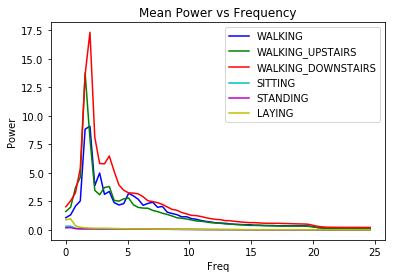

In [19]:
#Plot freq graph
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list = []
for x in labels:
    globals()['data_x_%s' % x] = body_acc_x.iloc[np.where(y_train.iloc[:,0]==x)]
    data_list.append(globals()['data_x_%s' % x])

plot_mean_FFT(data_list,len(data_list),colours,activity_label.iloc[:,1].values)

In [20]:
# Functions to filter data
def butter_pass(cutoff, fs, order=5, filter_type='low'):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = ss.butter(order, normal_cutoff, btype=filter_type, analog=False)
    return b, a

def butter_filter(data, cutoff, fs, order=5, filter_type='low'):
    b, a = butter_pass(cutoff, fs, order=order, filter_type= filter_type)
    y = ss.lfilter(b, a, data)
    return y

#plot freq graph after FFT
def plot_mean_filtered_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n][i])
            power_sum += power
        power_sum = power_sum/data[n].shape[0]
        plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')


#### Low-pass filter

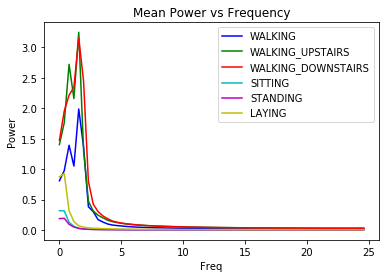

In [21]:
# Low-pass Filter
order = 3
fs = 50     # sample rate, Hz
cutoff = 1  # desired cutoff frequency of the filter, Hz
filter_type = 'low'

low_filtered = butter_filter(body_acc_x,cutoff,fs,order,filter_type)
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list_low = []
for x in labels:
    globals()['data_low_x_%s' % x] = low_filtered[np.where(y_train.iloc[:,0]==x)]
    data_list_low.append(globals()['data_low_x_%s' % x])

plot_mean_filtered_FFT(data_list_low,len(data_list_low),colours,activity_label.iloc[:,1].values)

#### High-pass filter

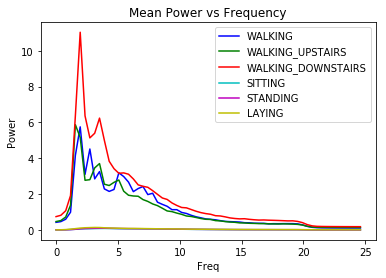

In [23]:
# High-pass Filter
order = 3
fs = 50     # sample rate, Hz
cutoff = 2  # desired cutoff frequency of the filter, Hz
filter_type = 'high'

high_filtered = butter_filter(body_acc_x,cutoff,fs,order,filter_type)
colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,0].values
data_list_high = []
for x in labels:
    globals()['data_high_x_%s' % x] = high_filtered[np.where(y_train.iloc[:,0]==x)]
    data_list_high.append(globals()['data_high_x_%s' % x])

plot_mean_filtered_FFT(data_list_high,len(data_list_high),colours,activity_label.iloc[:,1].values)

### (b) For a short sequence of walking and being idle

In [24]:
#plot freq graph after FFT
def plot_FFT(data, num_activities,colours,labels):
    for n in range(num_activities):
        power_sum = np.zeros(data[n].shape[1]//2)
        for i in range(data[n].shape[0]):
            freqs,power = graphFFT(data[n].iloc[i])
            power_sum += power
        #power_sum = power_sum/data[n].shape[0]
    plt.plot(freqs,power_sum,color=colours[n])
    plt.legend(labels)
    plt.ylabel('Power')
    plt.xlabel('Freq')
    plt.title('Mean Power vs Frequency')

In [27]:
#prepare data for comparison
import random
random.seed(1)
rand_walking = random.sample(range(0,data_x_1.shape[0]),2)
rand_laying = random.sample(range(0,data_x_6.shape[0]),2)
walk_lay_walk = data_x_1.iloc[rand_walking[0]].append(data_x_6.iloc[rand_laying[0]])
walk_lay_walk = walk_lay_walk.append(data_x_1.iloc[rand_walking[1]])
walk_walk = data_x_1.iloc[rand_walking[0]].append(data_x_1.iloc[rand_walking[1]])
lay_lay = data_x_6.iloc[rand_laying[0]].append(data_x_6.iloc[rand_laying[1]])

Text(0.5,1,'Power vs Frequency')

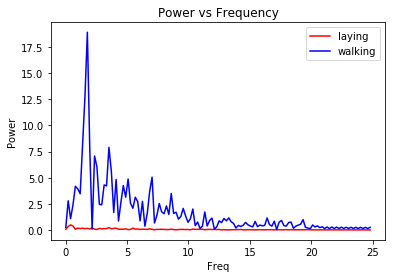

In [29]:
#walk_lay_walk = [walk_lay_walk]
#plot_FFT(walk_lay_walk,1,colours,labels)
freqs,power = graphFFT(lay_lay)
f,p = graphFFT(walk_walk)
plt.plot(freqs,power,color='r',label='laying')
plt.plot(f,p,color='b',label='walking')
plt.legend()
plt.ylabel('Power')
plt.xlabel('Freq')
plt.title('Power vs Frequency')

### 4.3(b)

/Users/justin/anaconda/envs/py35/lib/python2.7/site-packages/numpy/lib/histograms.py:822: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)


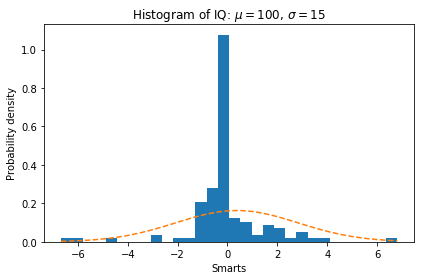

In [173]:
#FFT Coefficients
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fft(data_x_1.iloc[0]), bins=30, density=1)
mu = np.real(np.mean(fft(data_x_1.iloc[0])))
sigma = np.real(np.std(fft(data_x_1.iloc[0])))
bins = np.real(bins)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

#plt.show()
#plt.hist(fft(data_x_3.iloc[0]))

#### Comparing FFT Coefficients for different activties


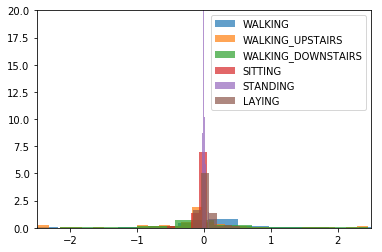

In [39]:
fig, ax = plt.subplots()

colours = ['b','g','r','c','m','y']
labels = activity_label.iloc[:,1].values

ax.hist(np.real(fft(data_x_1.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_2.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_3.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_4.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_5.iloc[0])), bins=30, density=1, alpha=0.7)
ax.hist(np.real(fft(data_x_6.iloc[0])), bins=30, density=1, alpha=0.7)
plt.xlim([-2.5,2.5])
plt.ylim([0,20])
plt.legend(labels)



can differentiate standing